<a href="https://colab.research.google.com/github/wenlonglian/Dissertation/blob/main/draftcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


migration//

flow and stock


In [ ]:
mig=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/移民/migration_imputed_RIKS_dec2021.csv')
# Filter the data for the years 2008 to 2019
mig = mig[(mig['year'] >= 2008) & (mig['year'] <= 2019)]

mig=mig.drop(columns=['inflow','outflow'],axis=1)

# Replace negative values in the 'flow' column with 0
mig['flow'] = mig['flow'].clip(lower=0)

# Display the filtered data
mig.head()

,iso_or,origin,iso_des,destination,year,stock,flow
48,AAB,Antigua and Barbuda,ABW,Aruba,2008,30,0.0
49,AAB,Antigua and Barbuda,ABW,Aruba,2009,28,0.0
50,AAB,Antigua and Barbuda,ABW,Aruba,2010,25,0.0
51,AAB,Antigua and Barbuda,ABW,Aruba,2011,22,0.0
52,AAB,Antigua and Barbuda,ABW,Aruba,2012,20,0.0


In [ ]:
mig.describe()

,year,stock,flow
count,480258.000000,4.802580e+05,480105.000000
mean,2013.180553,5.958092e+03,219.990279
std,3.274527,8.841550e+04,3897.189950
min,2008.000000,0.000000e+00,0.000000
25%,2010.000000,0.000000e+00,0.000000
50%,2013.000000,1.000000e+00,0.000000
75%,2016.000000,6.100000e+01,0.000000
max,2019.000000,1.223939e+07,618795.000000


voilence
should deal with the definition of indexes

In [ ]:
# Load the Excel file
file_path = '/content/drive/MyDrive/Colab_Notebooks/世界移民数据/暴力数据/GPI 2023 individual-indicators 2008-2023.xlsx'
# Reload the Excel file to make sure we have the correct object
xls = pd.ExcelFile(file_path)

In [ ]:
#先把表头名列出来，对每个表头分别提取数据并新增时间列，最后合并
# Display sheet names to understand the structure of the file
sheet_names = xls.sheet_names
# Initialize an empty DataFrame to hold the combined data
combined_df = pd.DataFrame()

# Iterate over the sheet names (excluding 'Contents' and 'Overall Scores')
for sheet in sheet_names:
    if sheet not in ['Contents', 'Overall Scores']:
        # Read each sheet into a DataFrame
        temp_df = pd.read_excel(xls, sheet_name=sheet)
        # Add a new column 'year' with the sheet name
        temp_df['year'] = sheet
        # Append the data to the combined DataFrame
        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
combined_df=combined_df.dropna()
# Reprocess the combined DataFrame to set the correct headers and reset index
combined_df=combined_df.reset_index(drop=True)
combined_df.columns = combined_df.iloc[0] # Set the first row (previously unnamed columns) as the header
#select rows with data
combined_df=combined_df[combined_df['Rank']!='Rank']

float_col=[ 'Overall Score', 'Rank',
       'Access To Small Arms', 'Armed Services Personnel Rate',
       'Deaths From External Conflict', 'Deaths From Internal Conflict',
       'External Conflicts Fought', 'External Peace', 'Homicide Rate',
       'Incarceration Rate', 'Intensity Of Internal Conflict',
       'Internal Conflicts Fought', 'Internal Peace', 'Militarisation',
       'Military Expenditure (% Gdp)', 'Neighbouring Countries Relations',
       'Nuclear And Heavy Weapons', 'Ongoing Conflict',
       'Perceptions Of Criminality', 'Police Rate', 'Political Instability',
       'Political Terror Scale', 'Refugees And Idps', 'Safety and Security',
       'Terrorism Impact', 'Un Peacekeeping Funding', 'Violent Crime',
       'Violent Demonstrations', 'Weapons Exports', 'Weapons Imports']
#datatyoe

peace=combined_df
for col in float_col:
  peace[col]=peace[col].astype('float')

print(peace.shape)
peace.head()

(2596, 34)


,Country,Iso3c,Year,Overall Score,Rank,Access To Small Arms,Armed Services Personnel Rate,Deaths From External Conflict,Deaths From Internal Conflict,External Conflicts Fought,...,Political Terror Scale,Refugees And Idps,Safety and Security,Terrorism Impact,Un Peacekeeping Funding,Violent Crime,Violent Demonstrations,Weapons Exports,Weapons Imports,2008
1,Afghanistan,AFG,2008,3.104,3.104,5.0,1.245,1.0,3.994,1.0,...,5.0,5.000,3.372441,4.0720,4.200000,3.0,1.50,1.000,1.043,2008
2,Albania,ALB,2008,1.791,1.791,4.0,1.529,1.0,1.000,1.5,...,2.5,1.170,2.235735,1.0040,1.544722,3.0,1.00,1.000,1.064,2008
3,Algeria,DZA,2008,2.253,2.253,3.0,1.654,1.0,2.276,1.0,...,4.0,1.010,2.524312,3.5728,3.118850,3.0,1.50,1.000,1.605,2008
4,Angola,AGO,2008,1.991,1.991,3.0,2.006,1.0,1.000,1.2,...,3.0,1.293,2.395206,1.0000,1.539251,2.5,2.25,1.000,1.094,2008
5,Argentina,ARG,2008,1.820,1.820,2.0,1.288,1.0,1.000,1.0,...,2.0,1.001,2.370653,1.0576,1.472312,3.0,1.00,1.001,1.074,2008


In [ ]:
combined_df.columns

Index(['Country', 'Iso3c', 'Year', 'Overall Score', 'Rank',
       'Access To Small Arms', 'Armed Services Personnel Rate',
       'Deaths From External Conflict', 'Deaths From Internal Conflict',
       'External Conflicts Fought', 'External Peace', 'Homicide Rate',
       'Incarceration Rate', 'Intensity Of Internal Conflict',
       'Internal Conflicts Fought', 'Internal Peace', 'Militarisation',
       'Military Expenditure (% Gdp)', 'Neighbouring Countries Relations',
       'Nuclear And Heavy Weapons', 'Ongoing Conflict',
       'Perceptions Of Criminality', 'Police Rate', 'Political Instability',
       'Political Terror Scale', 'Refugees And Idps', 'Safety and Security',
       'Terrorism Impact', 'Un Peacekeeping Funding', 'Violent Crime',
       'Violent Demonstrations', 'Weapons Exports', 'Weapons Imports', '2008'],
      dtype='object', name=0)

In [ ]:
peace=combined_df[['Country','Iso3c', 'Year', 'Overall Score', 'Deaths From External Conflict', 'Deaths From Internal Conflict','External Peace','Internal Peace','Violent Crime','Political Instability', 'Refugees And Idps']]

In [ ]:
peace.to_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/peace.csv')

gdp and economic


In [ ]:
gdp_raw=pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/70-20人口gdp消费.xlsx',sheet_name='Data')

gdp_raw.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gdp_raw['year'] = pd.to_numeric(gdp_raw['year'], errors='coerce')

# 筛选 'year' 在 2008 到 2019 之间的行
gdp_raw = gdp_raw[(gdp_raw['year'] >= 2008) & (gdp_raw['year'] <= 2019)]
gdp_1=gdp_raw[['countrycode', 'country','rgdpe','pop','emp','pl_c','year']]
# 删除带有空值的行
gdp_1 = gdp_1.dropna()
print(gdp_1.shape)
gdp_1.head()

(2124, 7)


,countrycode,country,rgdpe,pop,emp,pl_c,year
58,ABW,Aruba,4786.577148,0.101358,0.046435,0.733372,2008
59,ABW,Aruba,4350.844727,0.101455,0.046441,0.721062,2009
60,ABW,Aruba,4012.711670,0.101669,0.046500,0.732815,2010
61,ABW,Aruba,4092.740967,0.102046,0.045690,0.762688,2011
62,ABW,Aruba,3934.018311,0.102560,0.045920,0.762331,2012


In [ ]:
#gdp_1.dtypes

gravity index should deal with timeseries

In [ ]:
gra=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/Gravity_csv_V202211/Gravity_index.csv')
gra.head()

<ipython-input-12-fcd901baa481>:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  gra=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/Gravity_csv_V202211/Gravity_index.csv')


,year,country_id_o,country_id_d,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,2008,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gra.columns

Index(['year', 'country_id_o', 'country_id_d', 'iso3_o', 'iso3_d', 'iso3num_o',
       'iso3num_d', 'country_exists_o', 'country_exists_d',
       'gmt_offset_2020_o', 'gmt_offset_2020_d', 'distw_harmonic',
       'distw_arithmetic', 'distw_harmonic_jh', 'distw_arithmetic_jh', 'dist',
       'main_city_source_o', 'main_city_source_d', 'distcap', 'contig',
       'diplo_disagreement', 'scaled_sci_2021', 'comlang_off', 'comlang_ethno',
       'comcol', 'col45', 'legal_old_o', 'legal_old_d', 'legal_new_o',
       'legal_new_d', 'comleg_pretrans', 'comleg_posttrans',
       'transition_legalchange', 'comrelig', 'heg_o', 'heg_d', 'col_dep_ever',
       'col_dep', 'col_dep_end_year', 'col_dep_end_conflict', 'empire',
       'sibling_ever', 'sibling', 'sever_year', 'sib_conflict', 'pop_o',
       'pop_d', 'gdp_o', 'gdp_d', 'gdpcap_o', 'gdpcap_d', 'pop_source_o',
       'pop_source_d', 'gdp_source_o', 'gdp_source_d', 'gdp_ppp_o',
       'gdp_ppp_d', 'gdpcap_ppp_o', 'gdpcap_ppp_d', 'pop_pwt_o',

In [ ]:
gra=gra[['year','iso3_o', 'iso3_d','distw_arithmetic','contig', 'comlang_ethno',
       'col45','comrelig','pop_o',
       'pop_d', 'gdp_o', 'gdp_d']]

In [ ]:
gra.rename(columns={'iso3_o':'origincode',
          'iso3_d':'des_code',
          'distw_arithmetic':'dist_pop',
          'comlang_ethno':'common_lan',
          'col45':'colonial_link',
          'comrelig':'commom_reli',
          'pop_o':'o_pop',
          'pop_d':'d_pop',
          'gdp_o':'o_gdp',
          'gdp_d':'d_gdp'}
          ,inplace=True)


In [ ]:
#use the fillna method with the method='ffill' parameter to replace all NA values with the last non-NA value in the column.
gra.fillna(method='ffill', inplace=True)

gra.head()

,year,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,2008,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.344,101.344,2791960.832,2791960.832
1,2009,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.418,101.418,2498932.992,2498932.992
2,2010,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.597,101.597,2467703.808,2467703.808
3,2011,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.932,101.932,2584463.616,2584463.616
4,2012,ABW,ABW,32.0,0.0,0.0,0.0,0.746,102.384,102.384,2584463.616,2584463.616


In [ ]:
gra

,year,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,2008,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.344,101.344,2.791961e+06,2.791961e+06
1,2009,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.418,101.418,2.498933e+06,2.498933e+06
2,2010,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.597,101.597,2.467704e+06,2.467704e+06
3,2011,ABW,ABW,32.0,0.0,0.0,0.0,0.746,101.932,101.932,2.584464e+06,2.584464e+06
4,2012,ABW,ABW,32.0,0.0,0.0,0.0,0.746,102.384,102.384,2.584464e+06,2.584464e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
762043,2015,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,15777.451,15777.451,1.607238e+07,1.607238e+07
762044,2016,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,16150.362,16150.362,1.628921e+07,1.628921e+07
762045,2017,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,14236.599,14236.599,1.758489e+07,1.758489e+07
762046,2018,ZWE,ZWE,157.0,0.0,0.0,0.0,0.067,14438.812,14438.812,1.811554e+07,1.811554e+07


In [ ]:
# prompt: 筛选出gra中o_gdp与d_gdp列为0的行

gdp_zero = gra[(gra['o_gdp'].isna()) | (gra['d_gdp'].isna())]


In [ ]:
gdp_zero

,year,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp


还是需要另外找一个gdp的数据集

In [ ]:
gra.shape

(762048, 12)

In [ ]:
gra.dtypes

year               int64
origincode        object
des_code          object
dist_pop         float64
contig           float64
common_lan       float64
colonial_link    float64
commom_reli      float64
o_pop            float64
d_pop            float64
o_gdp            float64
d_gdp            float64
dtype: object

matrix

merge

数据少是gdp的原因,要重新找gdp数据

In [ ]:
merge=pd.merge(mig,gra,how='inner',left_on=('iso_or','iso_des','year'),right_on=('origincode', 'des_code','year'))

In [ ]:
merge.rename(columns={'iso_or':'Country Origin Code', 'iso_des':'Destination Code'},inplace=True)

In [ ]:
print(merge.shape)
merge.head()

(120992, 18)


,Country Origin Code,origin,Destination Code,destination,year,stock,flow,origincode,des_code,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,d_gdp
0,ABW,Aruba,AFG,Afghanistan,2008,0,0.0,ABW,AFG,13202.0,0.0,0.0,0.0,0.0,101.344,27032.198,2791960.832,1.019053e+07
1,ABW,Aruba,AFG,Afghanistan,2009,0,0.0,ABW,AFG,13202.0,0.0,0.0,0.0,0.0,101.418,27708.187,2498932.992,1.248695e+07
2,ABW,Aruba,AFG,Afghanistan,2010,0,0.0,ABW,AFG,13194.0,0.0,0.0,0.0,0.0,101.597,28397.812,2467703.808,1.593678e+07
3,ABW,Aruba,AFG,Afghanistan,2011,0,0.0,ABW,AFG,13194.0,0.0,0.0,0.0,0.0,101.932,29105.480,2584463.616,1.787016e+07
4,ABW,Aruba,AFG,Afghanistan,2012,0,0.0,ABW,AFG,13194.0,0.0,0.0,0.0,0.0,102.384,29824.535,2584463.616,2.050680e+07


In [ ]:
merge1=pd.merge(merge,gdp_1,how='inner',left_on=('Country Origin Code','year'),right_on=('countrycode','year'))
merge1.rename(columns={'countrycode':'ori', 'rgdpe':'o_gdp1','pop':'o_pop1','emp':'o_emp','pl_c':'o_plc'},inplace=True)
merge1=pd.merge(merge1,gdp_1,how='inner',left_on=('Destination Code','year'),right_on=('countrycode','year'))
merge1.rename(columns={'countrycode':'des', 'rgdpe':'d_gdp1','pop':'d_pop1','emp':'d_emp','pl_c':'d_plc'},inplace=True)

In [ ]:
print(merge1.shape)

merge1.head()

(72533, 30)


,Country Origin Code,origin,Destination Code,destination,year,stock,flow,origincode,des_code,dist_pop,...,o_gdp1,o_pop1,o_emp,o_plc,des,country_y,d_gdp1,d_pop1,d_emp,d_plc
0,ABW,Aruba,ALB,Albania,2008,0,0.0,ABW,ALB,9090.0,...,4786.577148,0.101358,0.046435,0.733372,ALB,Albania,25182.998047,3.002678,0.966534,0.559936
1,ARG,Argentina,ALB,Albania,2008,0,0.0,ARG,ALB,11632.0,...,720762.687500,40.080160,17.370251,0.501031,ALB,Albania,25182.998047,3.002678,0.966534,0.559936
2,ARM,Armenia,ALB,Albania,2008,3,0.0,ARM,ALB,2082.0,...,24141.988281,2.907618,1.184399,0.428926,ALB,Albania,25182.998047,3.002678,0.966534,0.559936
3,AUS,Austria,ALB,Albania,2008,0,0.0,AUS,ALB,15182.0,...,954499.937500,21.332282,10.757757,1.069079,ALB,Albania,25182.998047,3.002678,0.966534,0.559936
4,AZE,Azerbaijan,ALB,Albania,2008,0,0.0,AZE,ALB,2485.0,...,114055.234375,8.821873,4.250820,0.371715,ALB,Albania,25182.998047,3.002678,0.966534,0.559936


In [ ]:
merge1.columns

Index(['Country Origin Code', 'origin', 'Destination Code', 'destination',
       'year', 'stock', 'flow', 'origincode', 'des_code', 'dist_pop', 'contig',
       'common_lan', 'colonial_link', 'commom_reli', 'o_pop', 'd_pop', 'o_gdp',
       'd_gdp', 'ori', 'country_x', 'o_gdp1', 'o_pop1', 'o_emp', 'o_plc',
       'des', 'country_y', 'd_gdp1', 'd_pop1', 'd_emp', 'd_plc'],
      dtype='object')

In [ ]:
merge2=pd.merge(merge1,peace,how='inner',left_on=('Country Origin Code','year'),right_on=('Iso3c','Year'))

merge2=pd.merge(merge2,peace,how='inner',left_on=('Destination Code','year'),right_on=('Iso3c','Year'))


In [ ]:
print(merge2.shape)
merge2.head()

(52426, 52)


,Country Origin Code,origin,Destination Code,destination,year,stock,flow,origincode,des_code,dist_pop,...,Iso3c_y,Year_y,Overall Score_y,Deaths From External Conflict_y,Deaths From Internal Conflict_y,External Peace_y,Internal Peace_y,Violent Crime_y,Political Instability_y,Refugees And Idps_y
0,ARG,Argentina,ALB,Albania,2008,0,0.0,ARG,ALB,11632.0,...,ALB,2008,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
1,ARM,Armenia,ALB,Albania,2008,3,0.0,ARM,ALB,2082.0,...,ALB,2008,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
2,AUS,Austria,ALB,Albania,2008,0,0.0,AUS,ALB,15182.0,...,ALB,2008,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
3,AZE,Azerbaijan,ALB,Albania,2008,0,0.0,AZE,ALB,2485.0,...,ALB,2008,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
4,BEL,Belgium,ALB,Albania,2008,333,47.0,BEL,ALB,1585.0,...,ALB,2008,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17


In [ ]:
merge2.columns

Index(['Country Origin Code', 'origin', 'Destination Code', 'destination',
       'year', 'stock', 'flow', 'origincode', 'des_code', 'dist_pop', 'contig',
       'common_lan', 'colonial_link', 'commom_reli', 'o_pop', 'd_pop', 'o_gdp',
       'd_gdp', 'ori', 'country_x', 'o_gdp1', 'o_pop1', 'o_emp', 'o_plc',
       'des', 'country_y', 'd_gdp1', 'd_pop1', 'd_emp', 'd_plc', 'Country_x',
       'Iso3c_x', 'Year_x', 'Overall Score_x',
       'Deaths From External Conflict_x', 'Deaths From Internal Conflict_x',
       'External Peace_x', 'Internal Peace_x', 'Violent Crime_x',
       'Political Instability_x', 'Refugees And Idps_x', 'Country_y',
       'Iso3c_y', 'Year_y', 'Overall Score_y',
       'Deaths From External Conflict_y', 'Deaths From Internal Conflict_y',
       'External Peace_y', 'Internal Peace_y', 'Violent Crime_y',
       'Political Instability_y', 'Refugees And Idps_y'],
      dtype='object')

In [ ]:
merge2=merge2.drop(columns=['origincode', 'des_code',  'Iso3c_x', 'Year_x','Iso3c_y', 'Year_y'],axis=1)
print(merge2.shape)
merge2.head()

(52426, 46)


,Country Origin Code,origin,Destination Code,destination,year,stock,flow,dist_pop,contig,common_lan,...,Refugees And Idps_x,Country_y,Overall Score_y,Deaths From External Conflict_y,Deaths From Internal Conflict_y,External Peace_y,Internal Peace_y,Violent Crime_y,Political Instability_y,Refugees And Idps_y
0,ARG,Argentina,ALB,Albania,2008,0,0.0,11632.0,0.0,0.0,...,1.001,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
1,ARM,Armenia,ALB,Albania,2008,3,0.0,2082.0,0.0,0.0,...,1.169,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
2,AUS,Austria,ALB,Albania,2008,0,0.0,15182.0,0.0,0.0,...,1.000,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
3,AZE,Azerbaijan,ALB,Albania,2008,0,0.0,2485.0,0.0,0.0,...,3.607,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17
4,BEL,Belgium,ALB,Albania,2008,333,47.0,1585.0,0.0,0.0,...,1.000,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.17


In [ ]:
# prompt: 查看data中各列na值数量并将存在na值的列筛选出
merge2.fillna(0,inplace=True)
# Check for missing values in each column
missing_values = merge2.isnull().sum()

# Print the number of missing values in each column
print(missing_values)
merge2.fillna(0,inplace=True)



Country Origin Code                0
origin                             0
Destination Code                   0
destination                        0
year                               0
stock                              0
flow                               0
dist_pop                           0
contig                             0
common_lan                         0
colonial_link                      0
commom_reli                        0
o_pop                              0
d_pop                              0
o_gdp                              0
d_gdp                              0
ori                                0
country_x                          0
o_gdp1                             0
o_pop1                             0
o_emp                              0
o_plc                              0
des                                0
country_y                          0
d_gdp1                             0
d_pop1                             0
d_emp                              0
d

In [ ]:
#data.to_excel('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/cleaned_data.xlsx')

matrix用不了 因为有不同时间

In [ ]:
merge2.columns

Index(['Country Origin Code', 'origin', 'Destination Code', 'destination',
       'year', 'stock', 'flow', 'dist_pop', 'contig', 'common_lan',
       'colonial_link', 'commom_reli', 'o_pop', 'd_pop', 'o_gdp', 'd_gdp',
       'ori', 'country_x', 'o_gdp1', 'o_pop1', 'o_emp', 'o_plc', 'des',
       'country_y', 'd_gdp1', 'd_pop1', 'd_emp', 'd_plc', 'Country_x',
       'Overall Score_x', 'Deaths From External Conflict_x',
       'Deaths From Internal Conflict_x', 'External Peace_x',
       'Internal Peace_x', 'Violent Crime_x', 'Political Instability_x',
       'Refugees And Idps_x', 'Country_y', 'Overall Score_y',
       'Deaths From External Conflict_y', 'Deaths From Internal Conflict_y',
       'External Peace_y', 'Internal Peace_y', 'Violent Crime_y',
       'Political Instability_y', 'Refugees And Idps_y'],
      dtype='object')

In [ ]:
merge2

,Country Origin Code,origin,Destination Code,destination,year,stock,flow,dist_pop,contig,common_lan,...,Refugees And Idps_x,Country_y,Overall Score_y,Deaths From External Conflict_y,Deaths From Internal Conflict_y,External Peace_y,Internal Peace_y,Violent Crime_y,Political Instability_y,Refugees And Idps_y
0,ARG,Argentina,ALB,Albania,2008,0,0.0,11632.0,0.0,0.0,...,1.001,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.170
1,ARM,Armenia,ALB,Albania,2008,3,0.0,2082.0,0.0,0.0,...,1.169,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.170
2,AUS,Austria,ALB,Albania,2008,0,0.0,15182.0,0.0,0.0,...,1.000,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.170
3,AZE,Azerbaijan,ALB,Albania,2008,0,0.0,2485.0,0.0,0.0,...,3.607,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.170
4,BEL,Belgium,ALB,Albania,2008,333,47.0,1585.0,0.0,0.0,...,1.000,Albania,1.791,1.0,1.0,1.384961,2.061039,3.0,2.75,1.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52421,USA,United States of America,GNB,Guinea-Bissau,2019,247,0.0,8092.0,0.0,0.0,...,1.000,Guinea-Bissau,2.080,1.0,1.0,1.553731,2.430404,4.0,5.00,1.035
52422,LBR,Liberia,GNB,Guinea-Bissau,2019,695,0.0,810.0,0.0,0.0,...,1.037,Guinea-Bissau,2.080,1.0,1.0,1.553731,2.430404,4.0,5.00,1.035
52423,SEN,Senegal,GNB,Guinea-Bissau,2019,9487,0.0,369.0,1.0,0.0,...,1.039,Guinea-Bissau,2.080,1.0,1.0,1.553731,2.430404,4.0,5.00,1.035
52424,GHA,Ghana,BEN,Benin,2019,16072,305.0,433.0,0.0,0.0,...,1.019,Benin,1.925,1.0,1.0,1.435142,2.251913,3.0,2.50,1.002


In [ ]:
data=merge2[['Country Origin Code', 'origin', 'Destination Code', 'destination',
       'year', 'stock', 'flow', 'dist_pop', 'contig', 'common_lan',
       'colonial_link', 'commom_reli', 'o_pop1', 'd_pop1', 'o_gdp1', 'd_gdp1',
       'o_emp', 'o_plc','d_emp', 'd_plc', 'Overall Score_x', 'Deaths From External Conflict_x',
       'Deaths From Internal Conflict_x', 'External Peace_x',
       'Internal Peace_x', 'Violent Crime_x', 'Political Instability_x',
       'Refugees And Idps_x',  'Overall Score_y',
       'Deaths From External Conflict_y', 'Deaths From Internal Conflict_y',
       'External Peace_y', 'Internal Peace_y', 'Violent Crime_y',
       'Political Instability_y', 'Refugees And Idps_y']]

In [ ]:
data.rename(columns={'o_pop1':'o_pop', 'd_pop1':'d_pop', 'o_gdp1':'o_gdp', 'd_gdp1':'d_gdp'},inplace=True)

<ipython-input-37-c733684af467>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'o_pop1':'o_pop', 'd_pop1':'d_pop', 'o_gdp1':'o_gdp', 'd_gdp1':'d_gdp'},inplace=True)


In [ ]:
# prompt: 填充data中'o_emp', 'o_plc','d_emp', 'd_plc'列的na值为columns的平均值

import numpy as np

data['o_emp'].fillna(np.mean(data['o_emp']), inplace=True)
data['o_plc'].fillna(np.mean(data['o_plc']), inplace=True)
data['d_emp'].fillna(np.mean(data['d_emp']), inplace=True)
data['d_plc'].fillna(np.mean(data['d_plc']), inplace=True)


<ipython-input-38-b6b251b46259>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['o_emp'].fillna(np.mean(data['o_emp']), inplace=True)
<ipython-input-38-b6b251b46259>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['o_plc'].fillna(np.mean(data['o_plc']), inplace=True)
<ipython-input-38-b6b251b46259>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['d_emp'].fillna(np.mean(data['d_emp']), inplace=True)
<ipython-input-38-b

In [ ]:
# 假设你的 DataFrame 名称是 data
unique_country_codes = data['Country Origin Code'].nunique()
print(f"Country Origin Code 中有 {unique_country_codes} 个不同的值")

Country Origin Code 中有 68 个不同的值


In [ ]:
data.describe()

,stock,flow,dist_pop,contig,common_lan,colonial_link,commom_reli,o_pop,d_pop,o_gdp,...,Political Instability_x,Refugees And Idps_x,Overall Score_y,Deaths From External Conflict_y,Deaths From Internal Conflict_y,External Peace_y,Internal Peace_y,Violent Crime_y,Political Instability_y,Refugees And Idps_y
count,5.242600e+04,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,5.242600e+04,...,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000
mean,1.744020e+04,643.643269,7386.087457,0.032369,0.132492,0.004769,0.171473,78.077355,75.873900,1.128477e+06,...,2.569478,1.295470,2.088989,1.055465,1.467446,1.667472,2.370002,2.744650,2.549848,1.291638
std,2.162126e+05,9186.655776,4419.421423,0.176981,0.339028,0.068891,0.276802,229.325222,223.169261,3.111756e+06,...,0.962907,0.854207,0.418762,0.255634,0.842361,0.397982,0.550987,1.026077,0.962357,0.849084
min,0.000000e+00,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.746817,0.746817,2.045489e+03,...,1.000000,1.000000,1.327000,1.000000,1.000000,1.055560,1.186417,1.000000,1.000000,1.000000
25%,0.000000e+00,0.000000,3594.000000,0.000000,0.000000,0.000000,0.003000,5.522576,5.522576,3.893953e+04,...,1.750000,1.001000,1.846000,1.000000,1.000000,1.375208,2.029846,2.000000,1.750000,1.001000
50%,2.700000e+01,0.000000,6771.000000,0.000000,0.000000,0.000000,0.024000,14.774424,14.535739,1.646113e+05,...,2.750000,1.008000,2.043000,1.000000,1.000000,1.551172,2.362679,3.000000,2.625000,1.008000
75%,6.550000e+02,9.000000,10989.000000,0.000000,0.000000,0.000000,0.183000,45.222700,45.111532,6.754984e+05,...,3.250000,1.044000,2.311000,1.000000,2.008000,1.863807,2.683059,3.000000,3.250000,1.044000
max,1.223939e+07,618795.000000,19233.000000,1.000000,1.000000,1.000000,0.993000,1433.783686,1433.783686,2.086051e+07,...,5.000000,5.000000,3.379000,3.236000,5.000000,3.088897,4.095065,5.000000,5.000000,5.000000


data exploration

In [ ]:
# Count the number of zero values in 'flow' column
zero_count = (data['flow'] == 0).sum()

zero_count

32470

zero data counts 25933 in 43822 rows, which means 59% data are zero.Then I should do basic data exploration.Firstly，data1 including 0

In [ ]:
data.columns

Index(['Country Origin Code', 'origin', 'Destination Code', 'destination',
       'year', 'stock', 'flow', 'dist_pop', 'contig', 'common_lan',
       'colonial_link', 'commom_reli', 'o_pop', 'd_pop', 'o_gdp', 'd_gdp',
       'o_emp', 'o_plc', 'd_emp', 'd_plc', 'Overall Score_x',
       'Deaths From External Conflict_x', 'Deaths From Internal Conflict_x',
       'External Peace_x', 'Internal Peace_x', 'Violent Crime_x',
       'Political Instability_x', 'Refugees And Idps_x', 'Overall Score_y',
       'Deaths From External Conflict_y', 'Deaths From Internal Conflict_y',
       'External Peace_y', 'Internal Peace_y', 'Violent Crime_y',
       'Political Instability_y', 'Refugees And Idps_y'],
      dtype='object')

In [ ]:
import numpy as np
# 计算'mig_rate'列
##gdp和pop单位均为k
data['mig_rate'] = data['flow']/data['o_pop']/1000 #现在是一万个人口中有的移民的概率
data['mig_rate'] = data['mig_rate'].astype(float)
data['o_gdpp'] = data['o_gdp']/data['o_pop']
data['d_gdpp'] = data['d_gdp']/data['d_pop']
data['gdpp_gap'] = data['o_gdpp']-data['d_gdpp']#gdp is multicolinearary,so use a merging index
data['log_dist']=np.log(data['dist_pop'])
data['network']=data['stock']/data['d_pop']/1000
data1=data[['origin', 'flow', 'destination', 'dist_pop','Country Origin Code','Destination Code',
         'contig','stock','year','network',
       'common_lan', 'colonial_link', 'commom_reli',
         'Overall Score_x','o_emp', 'o_plc','d_emp', 'd_plc',
       'Deaths From External Conflict_x', 'Deaths From Internal Conflict_x',
       'External Peace_x', 'Internal Peace_x', 'Violent Crime_x',
       'Political Instability_x', 'Refugees And Idps_x', 'Overall Score_y',
       'Deaths From External Conflict_y', 'Deaths From Internal Conflict_y',
       'External Peace_y', 'Internal Peace_y', 'Violent Crime_y',
       'Political Instability_y', 'Refugees And Idps_y','mig_rate','gdpp_gap','log_dist']]
data1['log_mig_rate']=np.log(data1['mig_rate']+1)
data1.describe()

<ipython-input-43-518876cf7f31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mig_rate'] = data['flow']/data['o_pop']/1000 #现在是一万个人口中有的移民的概率
<ipython-input-43-518876cf7f31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mig_rate'] = data['mig_rate'].astype(float)
<ipython-input-43-518876cf7f31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,flow,dist_pop,contig,stock,network,common_lan,colonial_link,commom_reli,Overall Score_x,o_emp,...,Deaths From Internal Conflict_y,External Peace_y,Internal Peace_y,Violent Crime_y,Political Instability_y,Refugees And Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
count,52426.000000,52426.000000,52426.000000,5.242600e+04,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,...,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000,52426.000000
mean,643.643269,7386.087457,0.032369,1.744020e+04,0.806631,0.132492,0.004769,0.171473,2.096418,34.245610,...,1.467446,1.667472,2.370002,2.744650,2.549848,1.291638,0.045993,-322.515096,8.655506,0.016150
std,9186.655776,4419.421423,0.176981,2.162126e+05,7.283611,0.339028,0.068891,0.276802,0.421696,111.625915,...,0.842361,0.397982,0.550987,1.026077,0.962357,0.849084,2.122758,29080.753142,0.809677,0.123260
min,0.000000,12.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.327000,0.241678,...,1.000000,1.055560,1.186417,1.000000,1.000000,1.000000,0.000000,-165731.056944,2.484907,0.000000
25%,0.000000,3594.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.003000,1.851000,2.535331,...,1.000000,1.375208,2.029846,2.000000,1.750000,1.001000,0.000000,-11975.126651,8.187021,0.000000
50%,0.000000,6771.000000,0.000000,2.700000e+01,0.001235,0.000000,0.000000,0.024000,2.046000,4.839400,...,1.000000,1.551172,2.362679,3.000000,2.625000,1.008000,0.000000,-193.362028,8.820404,0.000000
75%,9.000000,10989.000000,0.000000,6.550000e+02,0.039410,0.000000,0.000000,0.183000,2.318000,19.854450,...,2.008000,1.863807,2.683059,3.000000,3.250000,1.044000,0.000445,11260.897843,9.304650,0.000445
max,618795.000000,19233.000000,1.000000,1.223939e+07,291.445663,1.000000,1.000000,0.993000,3.379000,799.306641,...,5.000000,3.088897,4.095065,5.000000,5.000000,5.000000,275.711305,165731.056944,9.864383,5.622975


In [ ]:
data1.rename(columns={'Overall Score_x':'o_overall', 'Overall Score_y':'d_overall'},inplace=True)

<ipython-input-44-2d52bd27c988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={'Overall Score_x':'o_overall', 'Overall Score_y':'d_overall'},inplace=True)


In [ ]:
data1.rename(columns={ 'Deaths From External Conflict_x': 'Deaths_From_External_Conflict_x',
    'Deaths From Internal Conflict_x': 'Deaths_From_Internal_Conflict_x',
    'External Peace_x': 'External_Peace_x',
    'Internal Peace_x': 'Internal_Peace_x',
    'Violent Crime_x': 'Violent_Crime_x',
    'Political Instability_x': 'Political_Instability_x',
    'Refugees And Idps_x': 'Refugees_And_Idps_x',
    'Overall Score_y': 'Overall_Score_y',
    'Deaths From External Conflict_y': 'Deaths_From_External_Conflict_y',
    'Deaths From Internal Conflict_y': 'Deaths_From_Internal_Conflict_y',
    'External Peace_y': 'External_Peace_y',
    'Internal Peace_y': 'Internal_Peace_y',
    'Violent Crime_y': 'Violent_Crime_y',
    'Political Instability_y': 'Political_Instability_y',
    'Refugees And Idps_y': 'Refugees_And_Idps_y'},inplace=True)


<ipython-input-45-09246988ae3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns={ 'Deaths From External Conflict_x': 'Deaths_From_External_Conflict_x',


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# prompt: 用iqr查看异常值，并去除

Q1 = data1['log_mig_rate'].quantile(0.25)
Q3 = data1['log_mig_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#data1_cleaned = data1[(data1['log_mig_rate'] >= lower_bound) & (data1['log_mig_rate'] <= upper_bound)]


In [ ]:
data_err=data1[data1['log_mig_rate']>=5]
data_err

,origin,flow,destination,dist_pop,Country Origin Code,Destination Code,contig,stock,year,network,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
37560,Estonia,360458.0,Finland,115.0,EST,FIN,0.0,401217,2016,72.978891,...,1.0,1.352581,1.386081,1.0,1.375,1.0,273.798148,-12329.045070,4.744932,5.616037
42218,Estonia,361301.0,Finland,115.0,EST,FIN,0.0,758588,2017,137.640525,...,1.0,1.522525,1.371215,1.0,1.250,1.0,273.839426,-11797.592311,4.744932,5.616187
46899,Estonia,364744.0,Finland,115.0,EST,FIN,0.0,1115851,2018,202.052629,...,1.0,1.479780,1.403953,1.0,1.000,1.0,275.711305,-11211.807910,4.744932,5.622975


In [ ]:
# 获取需要删除的索引
indexes_to_drop = data_err.index

# 从 data1 中删除这些索引
data1 = data1.drop(indexes_to_drop)

# 查看过滤后的数据形状
print(data1.shape)

(52423, 37)


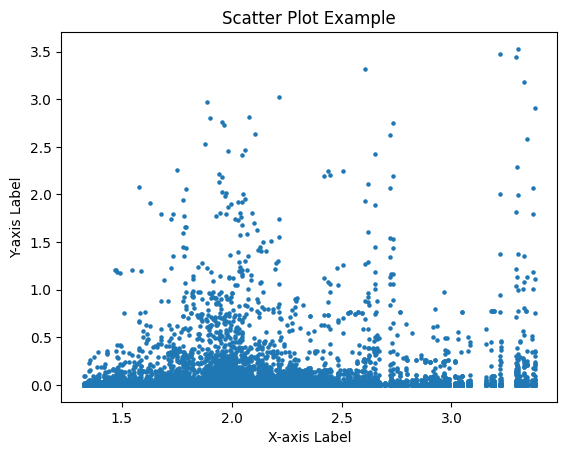

In [ ]:
x=data1['o_overall']
y=data1['log_mig_rate']
# 创建散点图
plt.scatter(x, y,s=5)

# 添加标题和标签
plt.title("Scatter Plot Example")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")



data1.shape
# 显示图表
plt.show()

数据根本就是破碎的

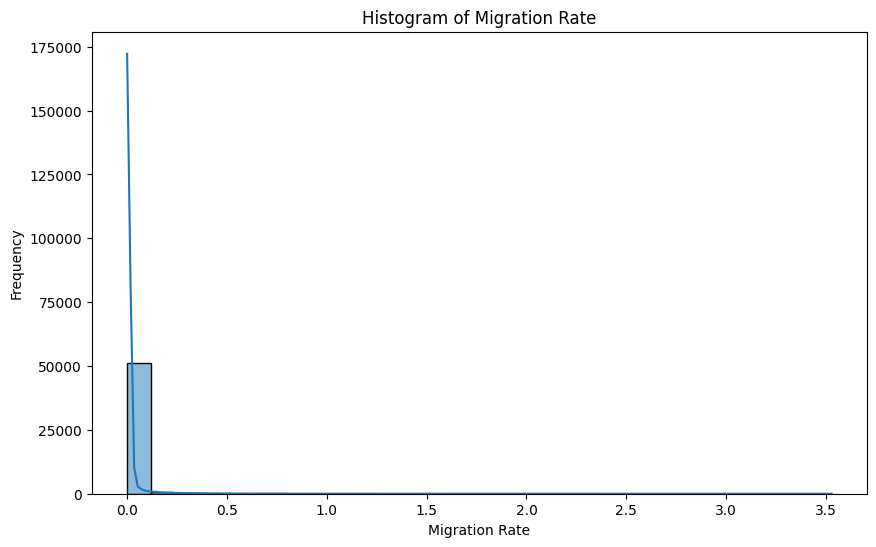

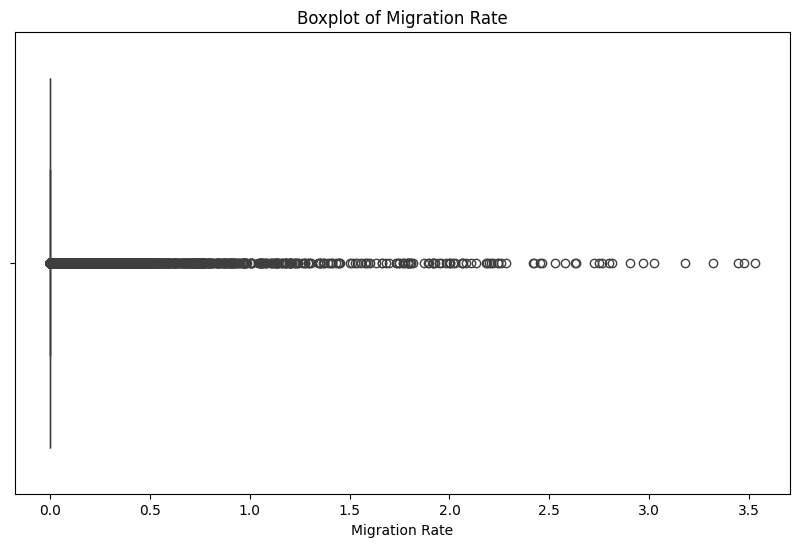

<ipython-input-51-df1c76f5d8c4>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['log_mig_rate'], shade=True)


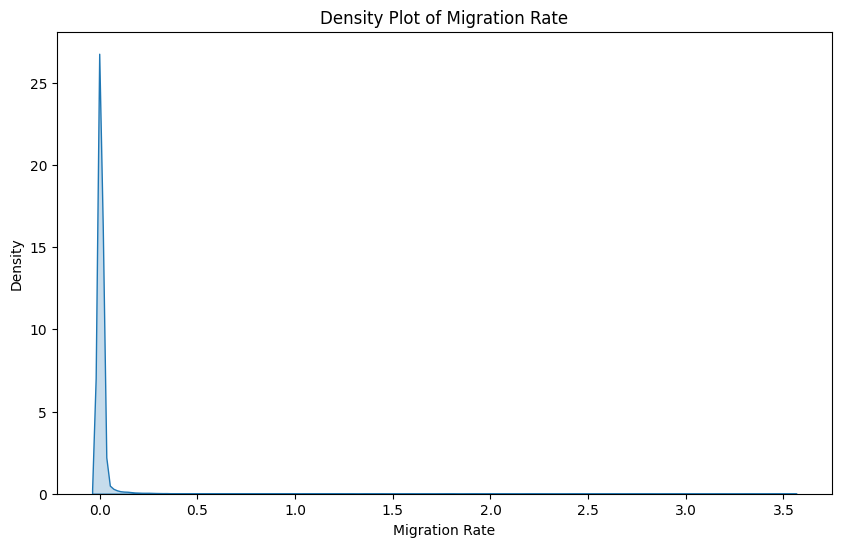

In [ ]:
# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(data1['log_mig_rate'], bins=30, kde=True)
plt.title('Histogram of Migration Rate')
plt.xlabel('Migration Rate')
plt.ylabel('Frequency')
plt.show()

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x=data1['log_mig_rate'])
plt.title('Boxplot of Migration Rate')
plt.xlabel('Migration Rate')
plt.show()

# 绘制密度图
plt.figure(figsize=(10, 6))
sns.kdeplot(data1['log_mig_rate'], shade=True)
plt.title('Density Plot of Migration Rate')
plt.xlabel('Migration Rate')
plt.ylabel('Density')
plt.show()

In [ ]:
data1.columns

Index(['origin', 'flow', 'destination', 'dist_pop', 'Country Origin Code',
       'Destination Code', 'contig', 'stock', 'year', 'network', 'common_lan',
       'colonial_link', 'commom_reli', 'o_overall', 'o_emp', 'o_plc', 'd_emp',
       'd_plc', 'Deaths_From_External_Conflict_x',
       'Deaths_From_Internal_Conflict_x', 'External_Peace_x',
       'Internal_Peace_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Refugees_And_Idps_x', 'd_overall', 'Deaths_From_External_Conflict_y',
       'Deaths_From_Internal_Conflict_y', 'External_Peace_y',
       'Internal_Peace_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Refugees_And_Idps_y', 'mig_rate', 'gdpp_gap', 'log_dist',
       'log_mig_rate'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 假设 data21 是你的数据框
# 选择要标准化的数值列
numeric_columns = [ 'log_dist','network','gdpp_gap','o_emp', 'o_plc','d_emp', 'd_plc']
data2=data1
# 初始化 RobustScaler
scaler = StandardScaler()


# 对数值列进行标准化
data2[numeric_columns] = scaler.fit_transform(data2[numeric_columns])




In [ ]:
data2.describe()

,flow,dist_pop,contig,stock,network,common_lan,colonial_link,commom_reli,o_overall,o_emp,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
count,52423.000000,52423.000000,52423.000000,5.242300e+04,5.242300e+04,52423.000000,52423.000000,52423.000000,52423.000000,5.242300e+04,...,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,5.242300e+04,5.242300e+04,52423.000000
mean,622.954409,7386.503558,0.032371,1.739779e+04,8.674577e-18,0.132499,0.004769,0.171447,2.096446,2.060212e-17,...,1.467473,1.667484,2.370058,2.744749,2.549925,1.291654,0.030290,2.168644e-17,-1.514798e-15,0.015829
std,8770.358430,4419.205552,0.176986,2.161348e+05,1.000010e+00,0.339036,0.068893,0.276790,0.421692,1.000010e+00,...,0.842378,0.397990,0.550953,1.026022,0.962330,0.849106,0.443802,1.000010e+00,1.000010e+00,0.115748
min,0.000000,12.000000,0.000000,0.000000e+00,-1.109625e-01,0.000000,0.000000,0.000000,1.327000,-3.046362e-01,...,1.000000,1.055560,1.186417,1.000000,1.000000,1.000000,0.000000,-5.687844e+00,-7.626283e+00,0.000000
25%,0.000000,3594.000000,0.000000,0.000000e+00,-1.109625e-01,0.000000,0.000000,0.003000,1.851000,-2.840889e-01,...,1.000000,1.375208,2.030156,2.000000,1.750000,1.001000,0.000000,-4.006755e-01,-5.792591e-01,0.000000
50%,0.000000,6771.000000,0.000000,2.700000e+01,-1.107911e-01,0.000000,0.000000,0.024000,2.046000,-2.634482e-01,...,1.000000,1.551172,2.362679,3.000000,2.625000,1.008000,0.000000,4.499043e-03,2.035146e-01,0.000000
75%,9.000000,10989.000000,0.000000,6.540000e+02,-1.054916e-01,0.000000,0.000000,0.183000,2.318000,-1.289382e-01,...,2.008000,1.864055,2.683059,3.000000,3.250000,1.044000,0.000445,3.983114e-01,8.019756e-01,0.000444
max,618795.000000,19233.000000,1.000000,1.223939e+07,4.037390e+01,1.000000,1.000000,0.993000,3.379000,6.853664e+00,...,5.000000,3.088897,4.095065,5.000000,5.000000,5.000000,33.071699,5.709979e+00,1.493728e+00,3.528467


In [ ]:
# 计算平移的值，保证最小值大于0
min_value = data2[numeric_columns].min().min()
if min_value < 0:
    shift_value = -min_value
    for col in numeric_columns:
        data2[col] = data2[col] + shift_value
data2.describe()

,flow,dist_pop,contig,stock,network,common_lan,colonial_link,commom_reli,o_overall,o_emp,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
count,52423.000000,52423.000000,52423.000000,5.242300e+04,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,...,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000
mean,622.954409,7386.503558,0.032371,1.739779e+04,7.626283,0.132499,0.004769,0.171447,2.096446,7.626283,...,1.467473,1.667484,2.370058,2.744749,2.549925,1.291654,0.030290,7.626283,7.626283,0.015829
std,8770.358430,4419.205552,0.176986,2.161348e+05,1.000010,0.339036,0.068893,0.276790,0.421692,1.000010,...,0.842378,0.397990,0.550953,1.026022,0.962330,0.849106,0.443802,1.000010,1.000010,0.115748
min,0.000000,12.000000,0.000000,0.000000e+00,7.515320,0.000000,0.000000,0.000000,1.327000,7.321647,...,1.000000,1.055560,1.186417,1.000000,1.000000,1.000000,0.000000,1.938439,0.000000,0.000000
25%,0.000000,3594.000000,0.000000,0.000000e+00,7.515320,0.000000,0.000000,0.003000,1.851000,7.342194,...,1.000000,1.375208,2.030156,2.000000,1.750000,1.001000,0.000000,7.225607,7.047024,0.000000
50%,0.000000,6771.000000,0.000000,2.700000e+01,7.515492,0.000000,0.000000,0.024000,2.046000,7.362835,...,1.000000,1.551172,2.362679,3.000000,2.625000,1.008000,0.000000,7.630782,7.829798,0.000000
75%,9.000000,10989.000000,0.000000,6.540000e+02,7.520791,0.000000,0.000000,0.183000,2.318000,7.497345,...,2.008000,1.864055,2.683059,3.000000,3.250000,1.044000,0.000445,8.024594,8.428259,0.000444
max,618795.000000,19233.000000,1.000000,1.223939e+07,48.000185,1.000000,1.000000,0.993000,3.379000,14.479947,...,5.000000,3.088897,4.095065,5.000000,5.000000,5.000000,33.071699,13.336262,9.120011,3.528467


In [ ]:
data1.describe()

,flow,dist_pop,contig,stock,network,common_lan,colonial_link,commom_reli,o_overall,o_emp,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
count,52423.000000,52423.000000,52423.000000,5.242300e+04,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,...,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000
mean,622.954409,7386.503558,0.032371,1.739779e+04,7.626283,0.132499,0.004769,0.171447,2.096446,7.626283,...,1.467473,1.667484,2.370058,2.744749,2.549925,1.291654,0.030290,7.626283,7.626283,0.015829
std,8770.358430,4419.205552,0.176986,2.161348e+05,1.000010,0.339036,0.068893,0.276790,0.421692,1.000010,...,0.842378,0.397990,0.550953,1.026022,0.962330,0.849106,0.443802,1.000010,1.000010,0.115748
min,0.000000,12.000000,0.000000,0.000000e+00,7.515320,0.000000,0.000000,0.000000,1.327000,7.321647,...,1.000000,1.055560,1.186417,1.000000,1.000000,1.000000,0.000000,1.938439,0.000000,0.000000
25%,0.000000,3594.000000,0.000000,0.000000e+00,7.515320,0.000000,0.000000,0.003000,1.851000,7.342194,...,1.000000,1.375208,2.030156,2.000000,1.750000,1.001000,0.000000,7.225607,7.047024,0.000000
50%,0.000000,6771.000000,0.000000,2.700000e+01,7.515492,0.000000,0.000000,0.024000,2.046000,7.362835,...,1.000000,1.551172,2.362679,3.000000,2.625000,1.008000,0.000000,7.630782,7.829798,0.000000
75%,9.000000,10989.000000,0.000000,6.540000e+02,7.520791,0.000000,0.000000,0.183000,2.318000,7.497345,...,2.008000,1.864055,2.683059,3.000000,3.250000,1.044000,0.000445,8.024594,8.428259,0.000444
max,618795.000000,19233.000000,1.000000,1.223939e+07,48.000185,1.000000,1.000000,0.993000,3.379000,14.479947,...,5.000000,3.088897,4.095065,5.000000,5.000000,5.000000,33.071699,13.336262,9.120011,3.528467


排除多重共线性

In [ ]:
data1.columns

Index(['origin', 'flow', 'destination', 'dist_pop', 'Country Origin Code',
       'Destination Code', 'contig', 'stock', 'year', 'network', 'common_lan',
       'colonial_link', 'commom_reli', 'o_overall', 'o_emp', 'o_plc', 'd_emp',
       'd_plc', 'Deaths_From_External_Conflict_x',
       'Deaths_From_Internal_Conflict_x', 'External_Peace_x',
       'Internal_Peace_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Refugees_And_Idps_x', 'd_overall', 'Deaths_From_External_Conflict_y',
       'Deaths_From_Internal_Conflict_y', 'External_Peace_y',
       'Internal_Peace_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Refugees_And_Idps_y', 'mig_rate', 'gdpp_gap', 'log_dist',
       'log_mig_rate'],
      dtype='object')

In [ ]:
# 选择特定的列
selected_columns = [
       'o_overall',
       'Deaths_From_External_Conflict_x', 'Deaths_From_Internal_Conflict_x',
       'External_Peace_x', 'Internal_Peace_x', 'Violent_Crime_x',
       'Political_Instability_x', 'Refugees_And_Idps_x', 'd_overall',
       'Deaths_From_External_Conflict_y', 'Deaths_From_Internal_Conflict_y',
       'External_Peace_y', 'Internal_Peace_y', 'Violent_Crime_y',
       'Political_Instability_y', 'Refugees_And_Idps_y', 'mig_rate',
       'gdpp_gap', 'log_dist', 'log_mig_rate','network']  # 替换为实际的列名
correlation_matrix_selected = data1[selected_columns].corr()

# 显示特定列的相关系数矩阵
print(correlation_matrix_selected)

                                 o_overall  Deaths_From_External_Conflict_x  \
o_overall                         1.000000                         0.183826   
Deaths_From_External_Conflict_x   0.183826                         1.000000   
Deaths_From_Internal_Conflict_x   0.761936                         0.075550   
External_Peace_x                  0.696329                         0.381224   
Internal_Peace_x                  0.937716                         0.049864   
Violent_Crime_x                   0.534770                        -0.090221   
Political_Instability_x           0.612676                        -0.067150   
Refugees_And_Idps_x               0.420942                         0.009057   
d_overall                        -0.002980                         0.000546   
Deaths_From_External_Conflict_y   0.000241                        -0.011871   
Deaths_From_Internal_Conflict_y  -0.001317                         0.002688   
External_Peace_y                 -0.003337          

检查VIF

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 选择用于计算VIF的变量
variables = [
     'Deaths_From_External_Conflict_x',
    'Deaths_From_Internal_Conflict_x', 'External_Peace_x', 'Internal_Peace_x',
    'Violent_Crime_x', 'Political_Instability_x', 'Refugees_And_Idps_x',
    'Deaths_From_External_Conflict_y', 'Deaths_From_Internal_Conflict_y',
    'External_Peace_y', 'Internal_Peace_y', 'Violent_Crime_y', 'Political_Instability_y',
    'Refugees_And_Idps_y', 'gdpp_gap', 'log_dist', 'contig', 'common_lan',
    'colonial_link', 'commom_reli','network', 'o_emp', 'o_plc', 'd_emp', 'd_plc'
]

# 提取用于计算VIF的变量数据
X = data1[variables]

# 添加常数项
X = sm.add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 将VIF值四舍五入并格式化为小数
vif_data["VIF"] = vif_data["VIF"].round(2)
# 输出VIF结果
print(vif_data)

                            feature     VIF
0                             const  560.58
1   Deaths_From_External_Conflict_x    1.31
2   Deaths_From_Internal_Conflict_x    3.14
3                  External_Peace_x    2.43
4                  Internal_Peace_x    7.54
5                   Violent_Crime_x    2.95
6           Political_Instability_x    2.18
7               Refugees_And_Idps_x    1.51
8   Deaths_From_External_Conflict_y    1.31
9   Deaths_From_Internal_Conflict_y    3.06
10                 External_Peace_y    2.36
11                 Internal_Peace_y    7.49
12                  Violent_Crime_y    3.00
13          Political_Instability_y    2.20
14              Refugees_And_Idps_y    1.49
15                         gdpp_gap    1.74
16                         log_dist    1.39
17                           contig    1.22
18                       common_lan    1.21
19                    colonial_link    1.07
20                      commom_reli    1.30
21                          netw

overall指标和其他有强共线性，因此要分开拟合

开始拟合模型

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建OLS模型公式
formula = (
    'log_mig_rate ~o_overall+d_overall+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)

# 拟合OLS模型
ols_model = smf.ols(formula=formula, data=data1).fit()

# 输出模型结果
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_mig_rate   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     468.2
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:32:53   Log-Likelihood:                 41537.
No. Observations:               52423   AIC:                        -8.305e+04
Df Residuals:                   52409   BIC:                        -8.292e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0608      0.010     -5.857

In [ ]:
data1

,origin,flow,destination,dist_pop,Country Origin Code,Destination Code,contig,stock,year,network,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
0,Argentina,0.0,Albania,11632.0,ARG,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.967330,8.498536,0.000000
1,Armenia,0.0,Albania,2082.0,ARM,ALB,0.0,3,2008,7.515459,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.634468,6.372322,0.000000
2,Austria,0.0,Albania,15182.0,AUS,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,8.887559,8.827708,0.000000
3,Azerbaijan,0.0,Albania,2485.0,AZE,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.793529,6.590999,0.000000
4,Belgium,47.0,Albania,1585.0,BEL,ALB,0.0,333,2008,7.530726,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.004360,8.817329,6.035247,0.004351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52421,United States of America,0.0,Guinea-Bissau,8092.0,USA,GNB,0.0,247,2019,7.533182,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,9.758815,8.050062,0.000000
52422,Liberia,0.0,Guinea-Bissau,810.0,LBR,GNB,0.0,695,2019,7.565579,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,7.621161,5.205606,0.000000
52423,Senegal,0.0,Guinea-Bissau,369.0,SEN,GNB,1.0,9487,2019,8.201368,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,7.688660,4.233926,0.000000
52424,Ghana,305.0,Benin,433.0,GHA,BEN,0.0,16072,2019,7.704503,...,1.0,1.435142,2.251913,3.0,2.50,1.002,0.010027,7.721020,4.431591,0.009977


In [ ]:
data1.to_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/data1.csv')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = (
    'log_mig_rate ~o_overall+d_overall+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model = smf.poisson(formula, data=data1).fit(maxiter=1000)

# 输出模型结果
print(ppml_model.summary())

Optimization terminated successfully.
         Current function value: 0.060953
         Iterations 44
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                52423
Model:                        Poisson   Df Residuals:                    52409
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.2324
Time:                        21:32:56   Log-Likelihood:                -3195.3
converged:                       True   LL-Null:                       -4162.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2749      2.058      5.479      0.000       7.241      15.308
o_overall        -0

In [ ]:
data1.columns

Index(['origin', 'flow', 'destination', 'dist_pop', 'Country Origin Code',
       'Destination Code', 'contig', 'stock', 'year', 'network', 'common_lan',
       'colonial_link', 'commom_reli', 'o_overall', 'o_emp', 'o_plc', 'd_emp',
       'd_plc', 'Deaths_From_External_Conflict_x',
       'Deaths_From_Internal_Conflict_x', 'External_Peace_x',
       'Internal_Peace_x', 'Violent_Crime_x', 'Political_Instability_x',
       'Refugees_And_Idps_x', 'd_overall', 'Deaths_From_External_Conflict_y',
       'Deaths_From_Internal_Conflict_y', 'External_Peace_y',
       'Internal_Peace_y', 'Violent_Crime_y', 'Political_Instability_y',
       'Refugees_And_Idps_y', 'mig_rate', 'gdpp_gap', 'log_dist',
       'log_mig_rate'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~ Deaths_From_External_Conflict_x + Deaths_From_Internal_Conflict_x + '
    'External_Peace_x + Internal_Peace_x + Violent_Crime_x + Political_Instability_x + '
    'Refugees_And_Idps_x  + Deaths_From_External_Conflict_y + '
    'Deaths_From_Internal_Conflict_y + External_Peace_y + Internal_Peace_y + '
    'Violent_Crime_y + Political_Instability_y + Refugees_And_Idps_y + '
    'gdpp_gap + log_dist + contig + common_lan + colonial_link + commom_reli+network+ o_emp+o_plc+d_emp+d_plc+ o_emp+o_plc+d_emp+d_plc'
)

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model1 = smf.poisson(formula, data=data1).fit(maxiter=1000)

# 输出模型结果
print(ppml_model1.summary())











Optimization terminated successfully.
         Current function value: 0.052946
         Iterations 43
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                52423
Model:                        Poisson   Df Residuals:                    52397
Method:                           MLE   Df Model:                           25
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.3332
Time:                        21:32:57   Log-Likelihood:                -2775.6
converged:                       True   LL-Null:                       -4162.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           9.0737      2.507      3.619 

和平指标越高，越不安全，所以正常来说应该是起始地正相关，终点负相关

如何判断非线性，记得之前literature有提到，查查看

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = (
    'log_mig_rate ~o_overall+d_overall+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model = smf.poisson(formula, data=data2).fit(maxiter=1000)

# 输出模型结果
print(ppml_model.summary())

Optimization terminated successfully.
         Current function value: 0.060953
         Iterations 44
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                52423
Model:                        Poisson   Df Residuals:                    52409
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.2324
Time:                        21:32:58   Log-Likelihood:                -3195.3
converged:                       True   LL-Null:                       -4162.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2749      2.058      5.479      0.000       7.241      15.308
o_overall        -0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PoissonRegressor

# 加载数据（假设data1是您的数据）
# data1 = pd.read_csv('path_to_your_data.csv')

# 将数据拆分为特征和目标变量
X = data2[['o_overall', 'd_overall', 'gdpp_gap', 'log_dist', 'contig', 'common_lan',
           'colonial_link', 'commom_reli', 'network', 'o_emp', 'o_plc', 'd_emp', 'd_plc']]
y = data2['log_mig_rate']

# 定义参数网格
param_grid = {
    'alpha': np.logspace(-4, 4, 10),  # 惩罚参数范围
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000]
}

# 初始化Poisson回归模型
poisson_model = PoissonRegressor()

# 使用GridSearchCV进行交叉验证
grid_search = GridSearchCV(poisson_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# 拟合模型
grid_search.fit(X, y)

# 获取最佳参数
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# 使用最佳参数重新拟合模型
optimized_model = PoissonRegressor(**best_params)
optimized_model.fit(X, y)

# 输出模型结果
print(f'Model coefficients: {optimized_model.coef_}')
print(f'Intercept: {optimized_model.intercept_}')


Best parameters: {'alpha': 0.005994842503189409, 'fit_intercept': False, 'max_iter': 1000}
Model coefficients: [ 0.05136219  0.14952585 -0.45043512 -0.46244374  0.35732538  0.35460487
  0.17334736  0.13517409  0.0925104  -0.25493934  0.13721616  0.21631503
  0.05735304]
Intercept: 0.0


In [ ]:
print(f'R-squared: {optimized_model.score(X, y)}')

R-squared: 0.28869393229892104


In [ ]:
#整体而言 和平不稳定指数对于全球人口迁移的影响不显著，促进人口迁移决策的引力因素有文化相似度，网络效应，政策实施度，阻力因素有距离，人均GDP差距，起始国雇佣率


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 构建PPML模型公式
formula = (
    'log_mig_rate ~ Deaths_From_External_Conflict_x + Deaths_From_Internal_Conflict_x + '
    'External_Peace_x + Internal_Peace_x + Violent_Crime_x + Political_Instability_x + '
    'Refugees_And_Idps_x  + Deaths_From_External_Conflict_y + '
    'Deaths_From_Internal_Conflict_y + External_Peace_y + Internal_Peace_y + '
    'Violent_Crime_y + Political_Instability_y + Refugees_And_Idps_y + '
    'gdpp_gap + log_dist + contig + common_lan + colonial_link + commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)

# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model1 = smf.poisson(formula, data=data2).fit(maxiter=1000)

# 输出模型结果
print(ppml_model1.summary())




Optimization terminated successfully.
         Current function value: 0.052946
         Iterations 43
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                52423
Model:                        Poisson   Df Residuals:                    52397
Method:                           MLE   Df Model:                           25
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.3332
Time:                        21:34:03   Log-Likelihood:                -2775.6
converged:                       True   LL-Null:                       -4162.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           9.0737      2.507      3.619 

特定国家

先做matrix，汇总，查看平均安全性地图，筛选出高危险区与低危险区数据，然后做表格说明主要输出国与接受国

In [ ]:
data2.describe()

,flow,dist_pop,contig,stock,network,common_lan,colonial_link,commom_reli,o_overall,o_emp,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
count,52423.000000,52423.000000,52423.000000,5.242300e+04,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,...,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000,52423.000000
mean,622.954409,7386.503558,0.032371,1.739779e+04,7.626283,0.132499,0.004769,0.171447,2.096446,7.626283,...,1.467473,1.667484,2.370058,2.744749,2.549925,1.291654,0.030290,7.626283,7.626283,0.015829
std,8770.358430,4419.205552,0.176986,2.161348e+05,1.000010,0.339036,0.068893,0.276790,0.421692,1.000010,...,0.842378,0.397990,0.550953,1.026022,0.962330,0.849106,0.443802,1.000010,1.000010,0.115748
min,0.000000,12.000000,0.000000,0.000000e+00,7.515320,0.000000,0.000000,0.000000,1.327000,7.321647,...,1.000000,1.055560,1.186417,1.000000,1.000000,1.000000,0.000000,1.938439,0.000000,0.000000
25%,0.000000,3594.000000,0.000000,0.000000e+00,7.515320,0.000000,0.000000,0.003000,1.851000,7.342194,...,1.000000,1.375208,2.030156,2.000000,1.750000,1.001000,0.000000,7.225607,7.047024,0.000000
50%,0.000000,6771.000000,0.000000,2.700000e+01,7.515492,0.000000,0.000000,0.024000,2.046000,7.362835,...,1.000000,1.551172,2.362679,3.000000,2.625000,1.008000,0.000000,7.630782,7.829798,0.000000
75%,9.000000,10989.000000,0.000000,6.540000e+02,7.520791,0.000000,0.000000,0.183000,2.318000,7.497345,...,2.008000,1.864055,2.683059,3.000000,3.250000,1.044000,0.000445,8.024594,8.428259,0.000444
max,618795.000000,19233.000000,1.000000,1.223939e+07,48.000185,1.000000,1.000000,0.993000,3.379000,14.479947,...,5.000000,3.088897,4.095065,5.000000,5.000000,5.000000,33.071699,13.336262,9.120011,3.528467


In [ ]:
# prompt: 筛选data2中o_overall大于2的行

data_50=data2[data2['o_overall'] > 2]
data__50=data2[data2['d_overall'] < 2]


In [ ]:
data2.to_csv('/content/drive/MyDrive/Colab_Notebooks/世界移民数据/data2.csv')

In [ ]:
# prompt: 按log_mig_rate值降序排列data2数据

data2.sort_values(by='log_mig_rate', ascending=False)


,origin,flow,destination,dist_pop,Country Origin Code,Destination Code,contig,stock,year,network,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
31070,Syrian Arab Rep.,618795.0,Turkey,752.0,SYR,TUR,1.0,2179235,2014,11.435061,...,2.781,1.817050,2.748729,3.0,2.500,1.029,33.071699,6.982352,5.113785,3.528467
26547,Syrian Arab Rep.,613253.0,Turkey,752.0,SYR,TUR,1.0,1568978,2013,10.385866,...,2.384,1.839379,2.782505,3.0,2.500,1.059,31.322840,6.998238,5.113785,3.475774
35593,Syrian Arab Rep.,547368.0,Turkey,771.0,SYR,TUR,1.0,2714792,2015,12.317510,...,2.000,1.690444,2.797881,3.0,2.750,1.027,30.413713,6.935108,5.144622,3.447245
22024,Syrian Arab Rep.,545980.0,Turkey,752.0,SYR,TUR,1.0,960975,2012,9.303501,...,2.196,1.668064,2.739997,3.0,2.500,1.062,26.712845,7.066002,5.113785,3.321896
40241,Syrian Arab Rep.,401572.0,Turkey,771.0,SYR,TUR,1.0,3101710,2016,12.912685,...,1.000,1.886189,2.795912,3.0,3.125,1.025,22.992200,6.949387,5.144622,3.177729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21495,United States of America,0.0,Rwanda,12912.0,USA,RWA,0.0,476,2012,7.521588,...,1.000,2.037160,2.222849,3.0,2.750,1.333,0.000000,9.470595,8.627556,0.000000
21496,Uzbekistan,0.0,Rwanda,6179.0,UZB,RWA,0.0,1,2012,7.515334,...,1.000,2.037160,2.222849,3.0,2.750,1.333,0.000000,7.877771,7.716726,0.000000
21497,Venezuela,0.0,Rwanda,10922.0,VEN,RWA,0.0,0,2012,7.515320,...,1.000,2.037160,2.222849,3.0,2.750,1.333,0.000000,8.239005,8.420700,0.000000
21498,Yemen; Rep.,0.0,Rwanda,15689.0,YEM,RWA,0.0,117,2012,7.516861,...,1.000,2.037160,2.222849,3.0,2.750,1.333,0.000000,7.701528,8.868306,0.000000


In [ ]:
# prompt: 筛选前百分之25行

top_10_percent = data2.head(int(len(data1) * 0.1))


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = (
    'log_mig_rate ~o_overall+d_overall+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model = smf.poisson(formula, data=data_50).fit(maxiter=1000)

# 输出模型结果
print(ppml_model.summary())

Optimization terminated successfully.
         Current function value: 0.058087
         Iterations 47
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                29413
Model:                        Poisson   Df Residuals:                    29399
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.2885
Time:                        21:34:06   Log-Likelihood:                -1708.5
converged:                       True   LL-Null:                       -2401.1
Covariance Type:            nonrobust   LLR p-value:                2.288e-288
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0797      1.979      2.566      0.010       1.200       8.959
o_overall         0

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = (
    'log_mig_rate ~o_overall+d_overall+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model = smf.poisson(formula, data=data__50).fit()

# 输出模型结果
print(ppml_model.summary())

         Current function value: 0.053663
         Iterations: 35
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                23385
Model:                        Poisson   Df Residuals:                    23371
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.2399
Time:                        21:34:07   Log-Likelihood:                -1254.9
converged:                      False   LL-Null:                       -1651.1
Covariance Type:            nonrobust   LLR p-value:                6.072e-161
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.7119      4.301     -3.188      0.001     -22.142      -5.281
o_overall        -0.0079      0.148     -0.054      0.95

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# 构建PPML模型公式
formula = (
    'log_mig_rate ~o_overall+d_overall+'
       'gdpp_gap+log_dist+'
       'contig+common_lan+'
       'colonial_link+commom_reli+network+ o_emp+o_plc+d_emp+d_plc'
)


# 拟合Poisson Pseudo-Maximum Likelihood (PPML)模型
ppml_model = smf.poisson(formula, data=top_10_percent).fit()

# 输出模型结果
print(ppml_model.summary())

         Current function value: 0.059949
         Iterations: 35
                          Poisson Regression Results                          
Dep. Variable:           log_mig_rate   No. Observations:                 5242
Model:                        Poisson   Df Residuals:                     5228
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.1041
Time:                        21:34:07   Log-Likelihood:                -314.25
converged:                      False   LL-Null:                       -350.76
Covariance Type:            nonrobust   LLR p-value:                 2.231e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -30.2632      8.144     -3.716      0.000     -46.226     -14.301
o_overall        -0.3068      0.363     -0.846      0.39

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


做matrix

In [ ]:
data2

,origin,flow,destination,dist_pop,Country Origin Code,Destination Code,contig,stock,year,network,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
0,Argentina,0.0,Albania,11632.0,ARG,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.967330,8.498536,0.000000
1,Armenia,0.0,Albania,2082.0,ARM,ALB,0.0,3,2008,7.515459,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.634468,6.372322,0.000000
2,Austria,0.0,Albania,15182.0,AUS,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,8.887559,8.827708,0.000000
3,Azerbaijan,0.0,Albania,2485.0,AZE,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.793529,6.590999,0.000000
4,Belgium,47.0,Albania,1585.0,BEL,ALB,0.0,333,2008,7.530726,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.004360,8.817329,6.035247,0.004351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52421,United States of America,0.0,Guinea-Bissau,8092.0,USA,GNB,0.0,247,2019,7.533182,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,9.758815,8.050062,0.000000
52422,Liberia,0.0,Guinea-Bissau,810.0,LBR,GNB,0.0,695,2019,7.565579,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,7.621161,5.205606,0.000000
52423,Senegal,0.0,Guinea-Bissau,369.0,SEN,GNB,1.0,9487,2019,8.201368,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,7.688660,4.233926,0.000000
52424,Ghana,305.0,Benin,433.0,GHA,BEN,0.0,16072,2019,7.704503,...,1.0,1.435142,2.251913,3.0,2.50,1.002,0.010027,7.721020,4.431591,0.009977


In [ ]:
data2

,origin,flow,destination,dist_pop,Country Origin Code,Destination Code,contig,stock,year,network,...,Deaths_From_Internal_Conflict_y,External_Peace_y,Internal_Peace_y,Violent_Crime_y,Political_Instability_y,Refugees_And_Idps_y,mig_rate,gdpp_gap,log_dist,log_mig_rate
0,Argentina,0.0,Albania,11632.0,ARG,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.967330,8.498536,0.000000
1,Armenia,0.0,Albania,2082.0,ARM,ALB,0.0,3,2008,7.515459,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.634468,6.372322,0.000000
2,Austria,0.0,Albania,15182.0,AUS,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,8.887559,8.827708,0.000000
3,Azerbaijan,0.0,Albania,2485.0,AZE,ALB,0.0,0,2008,7.515320,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.000000,7.793529,6.590999,0.000000
4,Belgium,47.0,Albania,1585.0,BEL,ALB,0.0,333,2008,7.530726,...,1.0,1.384961,2.061039,3.0,2.75,1.170,0.004360,8.817329,6.035247,0.004351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52421,United States of America,0.0,Guinea-Bissau,8092.0,USA,GNB,0.0,247,2019,7.533182,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,9.758815,8.050062,0.000000
52422,Liberia,0.0,Guinea-Bissau,810.0,LBR,GNB,0.0,695,2019,7.565579,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,7.621161,5.205606,0.000000
52423,Senegal,0.0,Guinea-Bissau,369.0,SEN,GNB,1.0,9487,2019,8.201368,...,1.0,1.553731,2.430404,4.0,5.00,1.035,0.000000,7.688660,4.233926,0.000000
52424,Ghana,305.0,Benin,433.0,GHA,BEN,0.0,16072,2019,7.704503,...,1.0,1.435142,2.251913,3.0,2.50,1.002,0.010027,7.721020,4.431591,0.009977


In [ ]:
# Select the relevant columns and group by origin and destination
flow = data2[['year', 'Country Origin Code','Destination Code','log_mig_rate', 'flow','stock',]]
# Rename columns to remove any extra spaces
flow.columns = flow.columns.str.strip()
# Group by 'origin' and 'destination' without aggregation
mean_flow = flow.groupby(['Country Origin Code','Destination Code']).mean(numeric_only=True).reset_index()
flow_matrix = mean_flow.pivot(index='Country Origin Code', columns='Destination Code', values='flow')
# Convert the flow values to integers
flow_matrix = flow_matrix.fillna(0).astype(int)
mean_flow.head()

,Country Origin Code,Destination Code,log_mig_rate,flow,stock
0,ALB,ARG,0.000202,0.583333,66.750000
1,ALB,ARM,0.000000,0.000000,2.000000
2,ALB,AUS,0.050099,149.666667,3109.166667
3,ALB,AZE,0.000000,0.000000,0.000000
4,ALB,BEL,0.210088,684.833333,8385.500000


In [ ]:
# Add summary row and column
flow_matrix['Total'] = flow_matrix.sum(axis=1)
flow_matrix.loc['Total'] = flow_matrix.sum()
flow_matrix

Destination Code,ALB,ARG,ARM,AUS,AZE,BEL,BEN,BLR,BOL,BRA,...,TKM,TUN,TUR,UGA,UKR,USA,UZB,VEN,YEM,Total
Country Origin Code,,,,,,,,,,,,,,,,,,,,,
ALB,0,0,0,149,0,684,0,0,0,0,...,0,0,108,0,12,3673,0,0,0,21754
ARG,0,0,0,45,0,71,0,0,1335,882,...,0,0,4,0,37,5814,0,97,0,16144
ARM,0,5,0,78,0,135,0,67,0,2,...,31,0,25,0,719,2753,4,0,0,12912
AUS,0,13,0,0,0,50,0,6,4,85,...,0,0,756,0,0,32,10,6,0,5162
AZE,0,1,298,46,0,22,0,151,0,0,...,50,0,1027,0,1223,1290,20,0,0,13626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,5,145,0,213,0,282,0,1,143,387,...,0,29,435,6,41,0,8,100,0,42643
UZB,0,4,27,52,0,16,0,164,0,1,...,320,0,260,0,3385,3541,0,0,0,30080
VEN,0,11471,0,46,0,123,0,0,354,17062,...,0,0,0,0,1,26021,0,0,0,308989


In [ ]:
# prompt: 保留origin与total
origin_em = flow_matrix[['Total']]
origin_em.columns = ['Total']
origin_em.drop('Total', inplace=True)
origin_em

<ipython-input-100-b392017502a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_em.drop('Total', inplace=True)


,Total
Country Origin Code,
ALB,21754
ARG,16144
ARM,12912
AUS,5162
AZE,13626
...,...
UKR,94131
USA,42643
UZB,30080


In [ ]:
# prompt: 只保留total row

destination_im = flow_matrix.tail(1)
# prompt: 创建新表，把destination作为索引，total作为列

destination_im = destination_im.T
destination_im.columns = ['Total']
destination_im.drop('Total', inplace=True)

destination_im

,Total
Destination Code,
ALB,448
ARG,38088
ARM,2950
AUS,24638
AZE,427
...,...
UKR,60084
USA,659879
UZB,3940


In [ ]:
gdp_1

,countrycode,country,rgdpe,pop,emp,pl_c,year
58,ABW,Aruba,4786.577148,0.101358,0.046435,0.733372,2008
59,ABW,Aruba,4350.844727,0.101455,0.046441,0.721062,2009
60,ABW,Aruba,4012.711670,0.101669,0.046500,0.732815,2010
61,ABW,Aruba,4092.740967,0.102046,0.045690,0.762688,2011
62,ABW,Aruba,3934.018311,0.102560,0.045920,0.762331,2012
...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,40141.617188,13.814629,6.393752,0.479228,2015
12806,ZWE,Zimbabwe,41875.203125,14.030331,6.504374,0.470640,2016
12807,ZWE,Zimbabwe,44672.175781,14.236595,6.611773,0.473560,2017
12808,ZWE,Zimbabwe,44325.109375,14.438802,6.714952,0.543757,2018


In [ ]:
gdp_mean=gdp_1.groupby('countrycode').mean(numeric_only=True).reset_index()
gdp_mean

,countrycode,rgdpe,pop,emp,pl_c,year
0,ABW,4066.123515,0.103563,0.046623,0.782655,2013.5
1,AGO,193160.304688,26.585919,13.944135,0.635455,2013.5
2,ALB,31003.953613,2.915942,0.954656,0.461732,2013.5
3,ARE,639475.739583,8.964156,5.420115,0.646502,2013.5
4,ARG,885973.364583,42.419232,19.098785,0.635442,2013.5
...,...,...,...,...,...,...
174,VNM,520583.635417,91.280773,51.191205,0.330441,2013.5
175,YEM,73844.589193,25.498029,4.688443,0.470241,2013.5
176,ZAF,698802.338542,54.124644,17.197417,0.490726,2013.5
177,ZMB,50703.263021,15.232791,4.342617,0.422919,2013.5


In [ ]:
peace_mean=peace.groupby(['Country','Iso3c']).mean(numeric_only=True).reset_index()
peace_mean

,Country,Iso3c,Overall Score,Deaths From External Conflict,Deaths From Internal Conflict,External Peace,Internal Peace,Violent Crime,Political Instability,Refugees And Idps
0,Afghanistan,AFG,3.338000,1.04425,4.645562,2.458596,3.924288,4.87500,4.687500,4.810437
1,Albania,ALB,1.782500,1.00000,1.000000,1.380642,2.050256,3.00000,2.718750,1.160187
2,Algeria,DZA,2.221437,1.00000,2.044313,1.712262,2.560895,2.40625,3.226562,1.004750
3,Angola,AGO,1.985562,1.00000,1.370187,1.563645,2.266785,2.87500,2.578125,1.078250
4,Argentina,ARG,1.908250,1.00000,1.000000,1.302132,2.312342,2.90625,2.445312,1.000125
...,...,...,...,...,...,...,...,...,...,...
158,Venezuela,VEN,2.529375,1.00000,1.593687,1.628276,3.130111,4.56250,3.617188,1.056062
159,Vietnam,VNM,1.858437,1.00000,1.000000,1.726483,1.946444,2.00000,2.617188,1.111187
160,Yemen,YEM,2.910438,1.17550,2.970438,2.201537,3.382869,3.59375,4.117188,2.765500
161,Zambia,ZMB,1.824812,1.00000,1.000000,1.295741,2.177564,3.00000,2.406250,1.000437


In [ ]:
country=pd.merge(origin_em,gdp_mean,left_on='Country Origin Code',right_on='countrycode',how='inner')
country=pd.merge(country,destination_im,left_on='countrycode',right_on='Destination Code',how='inner')
country['sum_emmig_rate']=country['Total_x']/country['pop']/1000
country.rename(columns={'Total_x':'emmig','Total_y':'immig'},inplace=True)
country=pd.merge(peace_mean,country,left_on='Iso3c',right_on='countrycode',how='inner')

country.drop(['countrycode'],axis=1,inplace=True)
country

,Country,Iso3c,Overall Score,Deaths From External Conflict,Deaths From Internal Conflict,External Peace,Internal Peace,Violent Crime,Political Instability,Refugees And Idps,emmig,rgdpe,pop,emp,pl_c,year,immig,sum_emmig_rate
0,Albania,ALB,1.782500,1.000000,1.000000,1.380642,2.050256,3.00000,2.718750,1.160187,21754,3.100395e+04,2.915942,0.954656,0.461732,2013.5,448,7.460367
1,Argentina,ARG,1.908250,1.000000,1.000000,1.302132,2.312342,2.90625,2.445312,1.000125,16144,8.859734e+05,42.419232,19.098785,0.635442,2013.5,38088,0.380582
2,Armenia,ARM,2.061187,1.000000,1.114062,2.047135,2.070561,2.40625,3.148438,1.153188,12912,3.031022e+04,2.913313,1.089559,0.357571,2013.5,2950,4.432067
3,Australia,AUS,1.435000,1.000000,1.005437,1.290673,1.531417,1.40625,1.015625,1.000000,5162,1.138313e+06,23.367690,11.709666,1.153482,2013.5,24638,0.220903
4,Azerbaijan,AZE,2.224438,1.007875,1.271437,2.220844,2.226823,2.00000,3.554688,3.189687,13626,1.487393e+05,9.440179,4.658190,0.335402,2013.5,427,1.443405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Ukraine,UKR,2.529250,1.000000,1.931000,2.111309,2.807761,3.46875,3.437500,1.765125,94131,4.945479e+05,45.146396,18.570146,0.291855,2013.5,60084,2.085017
63,United States of America,USA,2.323437,2.430750,1.065250,2.705154,2.069295,1.43750,1.140625,1.000063,42643,1.820351e+07,317.053932,148.449275,0.920703,2013.5,659879,0.134498
64,Uzbekistan,UZB,2.115250,1.000000,1.000000,1.651952,2.424114,3.00000,3.546875,1.006062,30080,2.811087e+05,30.231904,13.134053,0.357631,2013.5,3940,0.994975
65,Venezuela,VEN,2.529375,1.000000,1.593687,1.628276,3.130111,4.56250,3.617188,1.056062,308989,2.994823e+05,29.076501,12.331619,6.011777,2013.5,23290,10.626760


In [ ]:
country.columns

Index(['Country', 'Iso3c', 'Overall Score', 'Deaths From External Conflict',
       'Deaths From Internal Conflict', 'External Peace', 'Internal Peace',
       'Violent Crime', 'Political Instability', 'Refugees And Idps', 'emmig',
       'rgdpe', 'pop', 'emp', 'pl_c', 'year', 'immig', 'sum_emmig_rate'],
      dtype='object')

In [ ]:
country.rename(columns={'Overall Score':'Overall_Score'},inplace=True)

In [ ]:
# prompt: 查看各列na值

missing_values = country.isnull().sum()

# Print the number of missing values in each column
print(missing_values)


Country                          0
Iso3c                            0
Overall_Score                    0
Deaths From External Conflict    0
Deaths From Internal Conflict    0
External Peace                   0
Internal Peace                   0
Violent Crime                    0
Political Instability            0
Refugees And Idps                0
emmig                            0
rgdpe                            0
pop                              0
emp                              0
pl_c                             0
year                             0
immig                            0
sum_emmig_rate                   0
dtype: int64


In [ ]:
# prompt: 把所有列名中的空格换成下划线

country.columns = country.columns.str.replace(' ', '_')


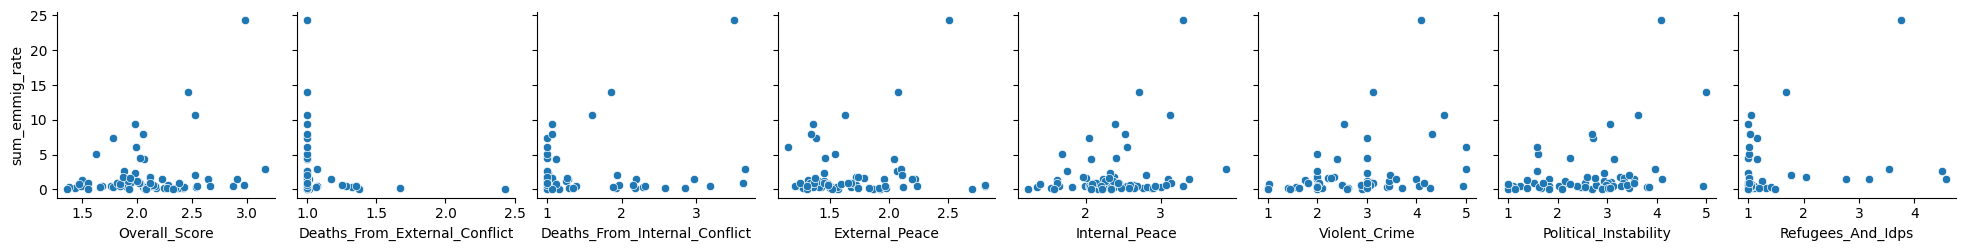

In [ ]:
# prompt: 绘制sum_mig_rate与其他各指标的pairplot

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot of sum_mig_rate with other numeric columns
sns.pairplot(data=country, x_vars=['Overall_Score', 'Deaths_From_External_Conflict', 'Deaths_From_Internal_Conflict',
       'External_Peace', 'Internal_Peace', 'Violent_Crime',
       'Political_Instability', 'Refugees_And_Idps'], y_vars=['sum_emmig_rate'])

# Show the plot
plt.show()


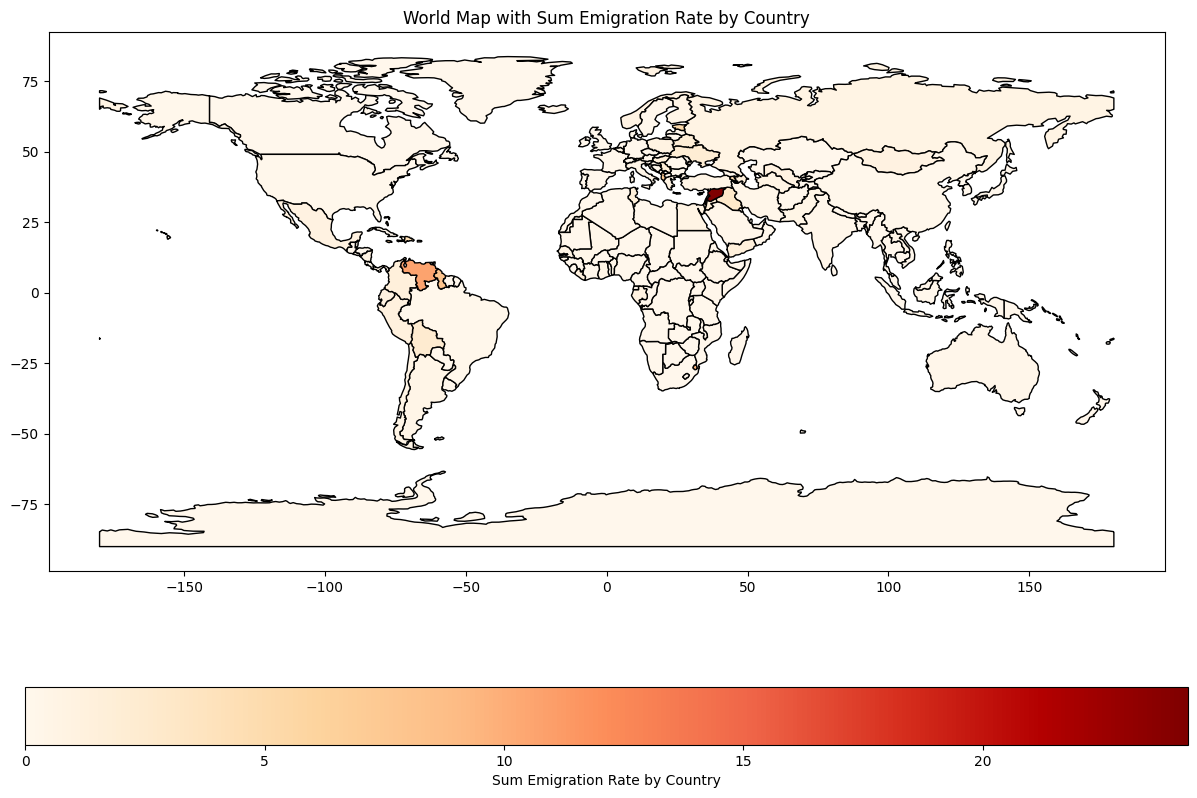

In [ ]:
# 确保列名一致
world = world.rename(columns={'iso_a3': 'Iso3c'})

# 将用户数据与世界地图数据合并S
merged = world.merge(country, on='Iso3c',how='left')
# prompt: merged的'emmig','sum_emmig_rate'两列填充na值为0

merged['Overall Score'].fillna(0, inplace=True)
merged['sum_emmig_rate'].fillna(0, inplace=True)
# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='sum_emmig_rate', ax=ax, legend=True,
            legend_kwds={'label': "Sum Emigration Rate by Country",
                         'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

# 设置图形标题
plt.title('World Map with Sum Emigration Rate by Country')
plt.show()

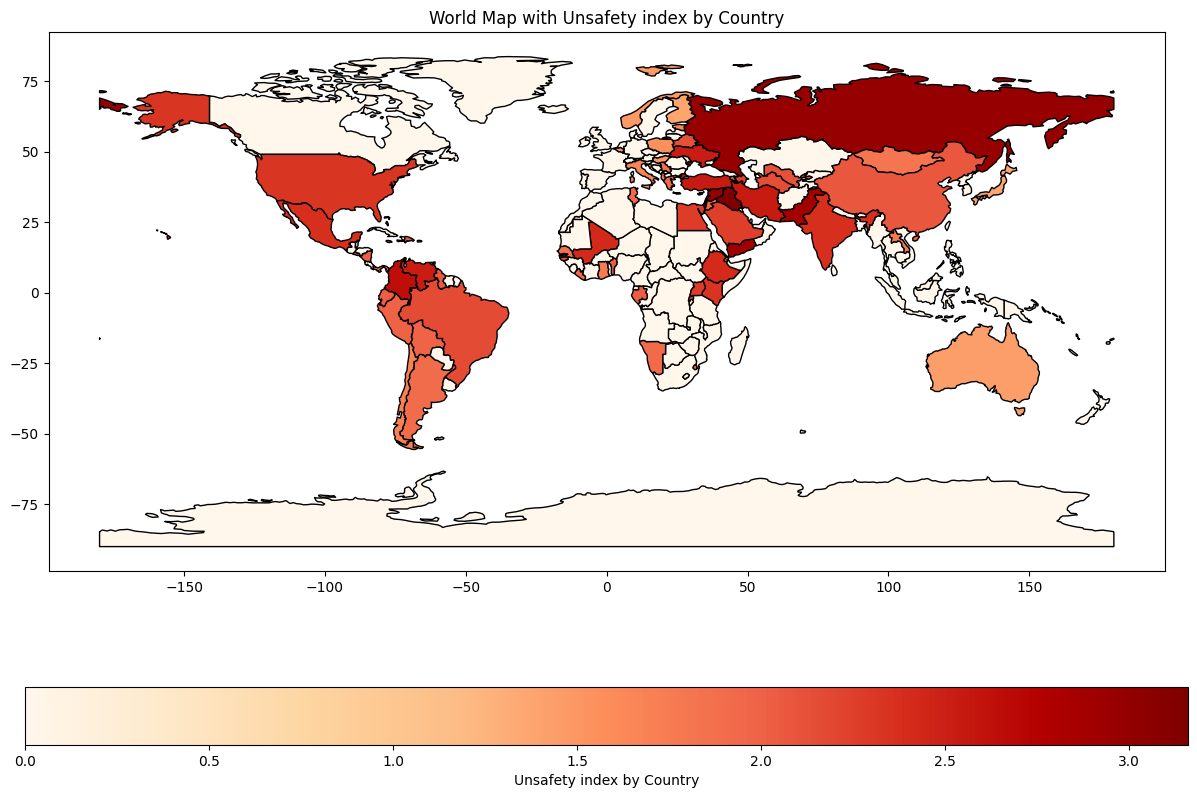

In [ ]:

# 绘制属性地图
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='Overall Score', ax=ax, legend=True,
            legend_kwds={'label': "Unsafety index by Country",
                         'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

# 设置图形标题
plt.title('World Map with Unsafety index by Country')
plt.show()